# <a id='toc1_'></a>[Проект: Анализ бизнес-показателей](#toc0_)


**Содержание**<a id='toc0_'></a>    
- [Проект: Анализ бизнес-показателей](#toc1_)    
  - [Описание проекта](#toc1_1_)    
    - [Цель проекта](#toc1_1_1_)    
    - [Описание данных](#toc1_1_2_)    
    - [Предстоит изучить:](#toc1_1_3_)    
  - [Загрузка данных и подготовка их к анализу](#toc1_2_)    
  - [Функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#toc1_3_)    
  - [Исследовательский анализ данных](#toc1_4_)    
  - [Маркетинг](#toc1_5_)    
  - [Оценка окупаемости рекламы](#toc1_6_)    
  - [Выводы](#toc1_7_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Описание проекта](#toc0_)

Для развлекательного приложения Procrastinate Pro+ необходимо провести анализ. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

### <a id='toc1_1_1_'></a>[Цель проекта](#toc0_)
Необходимо разобраться в причинах убытков и помочь компании выйти в плюс.
  

### <a id='toc1_1_2_'></a>[Описание данных](#toc0_)
Выгружены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:  
* лог сервера с данными об их посещениях,  
* выгрузка их покупок за этот период,
* рекламные расходы.

### <a id='toc1_1_3_'></a>[Предстоит изучить:](#toc0_)
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов,
* сколько денег приносит каждый клиент,  
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.

## <a id='toc1_2_'></a>[Загрузка данных и подготовка их к анализу](#toc0_)

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов.  

Изучим данные и выполним предобработку.

In [1]:
# Загрузка библиотек

import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', None)

In [ ]:
# Загрузим файлы и сохраним в переменные

visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
# Напишем функцию обзора данных

def explore_data(df_list):
  for i, df in enumerate(df_list):
        print(20 * '')
        print(f'Датасет {i+1}')
        df_name = [name for name, value in globals().items() if value is df][0]
        print(f"'{df_name}'")

        print('Первые 5 строк:')
        display(df.head())
        print(20 * '')

        print('Общая информация:')
        df.info()
        print(20 * '')

        print('Количество дубликатов:')
        print(df.duplicated().sum())
        print(20 * '')

        print('Количество пропусков:')
        print(df.isnull().sum().sort_values(ascending=False))
        print('----------'*10)

In [4]:
# Изучим данные
datasets = [visits, orders, costs]
explore_data(datasets)


Датасет 1
'visits'
Первые 5 строк:


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Количество дубликатов:
0

Количество пропусков:
User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64
----------------------------------------------------------------------------------------------------

Датасет 2
'orders'
Первые 5 строк:


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Количество дубликатов:
0

Количество пропусков:
User Id     0
Event Dt    0
Revenue     0
dtype: int64
----------------------------------------------------------------------------------------------------

Датасет 3
'costs'
Первые 5 строк:


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB

Количество дубликатов:
0

Количество пропусков:
dt         0
Channel    0
costs      0
dtype: int64
----------------------------------------------------------------------------------------------------


* В загруженных данных явных дубликатов нет  
* Приведем названия столбцов к нижнему регистру
* Переименуем некоторые столбцы
* Необходимо поменять тип данных у всех столбцов со временем

In [5]:
# Приведем названия столбцов к нижнему регистру
for df in datasets:
  df.columns = df.columns.str.lower()

In [6]:
# Переименуем некоторые столбцы
visits = visits.rename(columns={'user id':'user_id', 'session start':'session_start', 'session end':'session_end'})
orders = orders.rename(columns={'user id': 'user_id', 'event dt':'event_dt'})

In [7]:
# Изменим тип данных на временной
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

Проверим данные на возможные ошибки

In [9]:
    errors = visits[visits['session_end'] < visits['session_start']]
    print(f"Количество сессий, закончившихся раньше, чем начались: {len(errors)}")

Количество сессий, закончившихся раньше, чем начались: 0


In [10]:
# Проверим числовые значения на возможные аномалии

print('Описательные статистики для visits')
display(visits.describe().T)
print('\nОписательные статистики для orders')
display(orders.describe().T)
print('\nОписательные статистики для costs')
display(costs.describe().T)


Описательные статистики для visits


,count,mean,std,min,25%,50%,75%,max
user_id,309901.0,4.997664e+11,2.887899e+11,599326.0,2.493691e+11,4.989906e+11,7.495211e+11,9.999996e+11



Описательные статистики для orders


,count,mean,std,min,25%,50%,75%,max
user_id,40212.0,4.990295e+11,2.860937e+11,599326.00,2.511324e+11,4.982840e+11,7.433327e+11,9.998954e+11
revenue,40212.0,5.370608e+00,3.454208e+00,4.99,4.990000e+00,4.990000e+00,4.990000e+00,4.999000e+01



Описательные статистики для costs


,count,mean,std,min,25%,50%,75%,max
costs,1800.0,58.609611,107.740223,0.8,6.495,12.285,33.6,630.0


Аномальных значений не выявлено



---

В процессе предварительной обработки данных:

1. Были загружены данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные visits, orders, costs:

 * Датасет visits содержит 309901 запись о визитах, стране пользователя, устройстве и канале привлечения,
 * В orders содержится информация о 40212 заказах,
 * В файле costs 1800 записей о рекламных расходах и каналах привлечения.

2. Пропусков и явных дубликатов не обнаружено
3. Названия столбцов приведены к нижнему регистру
4. Изменен тип данных в некоторых столбцах на временной
5. Числовые значения проверены на возможные ошибки. Аномалий не выявлено

## <a id='toc1_3_'></a>[Функции для расчёта и анализа LTV, ROI, удержания и конверсии.](#toc0_)

Зададим функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция `get_profiles()` — для создания профилей пользователей**

In [11]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].dt.to_period('M')     #.astype('datetime64[M]')


    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')
    #costs['acquisition_cost'] = costs.set_index('key').join(new_users.set_index('key'))

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']


    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


#profiles = get_profiles(visits, orders, costs)
#profiles.head()


**Функция `get_retention()` — для подсчёта Retention Rate**

In [12]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days=horizon_days - 1)
    result_raw  = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция `get_conversion()` — для подсчёта конверсии**

In [13]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Функция `get_ltv()` — для подсчёта LTV**

In [14]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC,
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Функция `filter_data()` — для сглаживания данных**

In [15]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df

**Функция `plot_retention()` — для построения графика Retention Rate**

In [16]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )

    plt.tight_layout()
    plt.show()

**Функция `plot_conversion()` — для построения графика конверсии**

In [17]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Функция `plot_ltv_roi` — для визуализации LTV и ROI**

In [18]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## <a id='toc1_4_'></a>[Исследовательский анализ данных](#toc0_)



1. Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

In [19]:
# Построим профили пользователей с помощью функции get_profiles

profiles = get_profiles(visits, orders, costs)
display(profiles.head())

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10,False,0.230769


In [50]:
# Определим минимальную и максимальную даты привлечения пользователей

print('Минимальная дата привлечения пользователей: {}'.format(profiles.first_ts.min()))
print('Максимальная дата привлечения пользователей: {}'.format(profiles.first_ts.max()))

# момент анализа согласно условиям проекта
observation_date = datetime(2019, 11, 1).date()

#горизонт анализа - 2 недели (14 дней)
horizon_days = 14

# максимальная дата анализа
max_analysis_date = observation_date - timedelta(days = horizon_days - 1)
print('Максимальная дата для анализа:', max_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04
Максимальная дата для анализа: 2019-10-19




---
Составлены профили  пользователей. Лог содержит информацию о пользователях, которые присоединились к сервису с 1 мая по 27 октября 2019 года.  

Для исследования принимаем горизонт анализа 14 дней, точку наблюдения — 1 ноября.   

Максимальная дата для анализа - 19.10.2019 - входит в наш временной интервал,  
таким образом данные соответсвуют условию проекта. 

---

Большинство пользователей сервиса — из США (66.7 %).

2. Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.  
Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [21]:
# Из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

regions = (
    profiles.groupby('region')['user_id'].nunique().reset_index().
    merge(profiles[profiles['payer']==True].groupby('region')['user_id'].nunique().reset_index(), on = 'region', how = 'left')
)
regions.columns = ['region','total_users','payers']
regions['payers_rate'] = (regions.payers/regions.total_users)*100

print('Распределение пользователей по странам')
display(regions.sort_values(by='payers_rate', ascending=False)
        .reset_index(drop=True)
        .style.format({'payers_rate': '{:.2f}%'})
       )

Распределение пользователей по странам


,region,total_users,payers,payers_rate
0,United States,100002,6902,6.90%
1,Germany,14981,616,4.11%
2,UK,17575,700,3.98%
3,France,17450,663,3.80%


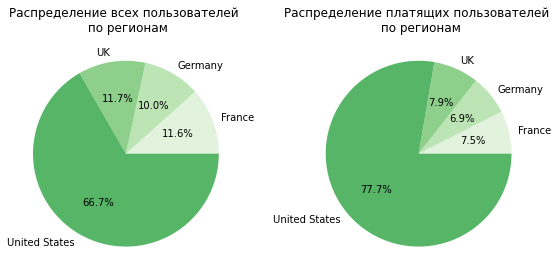

In [22]:
# графики распределения пользователей по странам

# Создаем два объекта графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
colors = sns.color_palette("Greens")

# Создаем график для всех пользователей
ax1.pie(regions.total_users, labels=regions.region, autopct='%1.1f%%', colors=colors)
ax1.set_title('Распределение всех пользователей \n по регионам')

# Создаем график для платящих пользователей
ax2.pie(regions.payers, labels=regions.region, autopct='%1.1f%%', colors=colors)
ax2.set_title('Распределение платящих пользователей \n по регионам')

# Показываем графики
plt.tight_layout()
plt.show()



---

 Большинство пользователей сервиса — из США (66.7 %).  

 Конверсия в платящих пользователей среди жителей США также существенно выше, чем в Европейских странах:  
  * США ~ 7%   
  * страны Европы ~ 4%.




---



3. Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.  
Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [23]:
# распределение платящих пользователей по устройствам

devices = (
    profiles.groupby('device')['user_id'].nunique().reset_index().
    merge(profiles[profiles['payer']==True].groupby('device')['user_id'].nunique().reset_index(), on = 'device', how = 'left')
)
devices.columns = ['device','total_users','payers']
devices['payers_rate'] = (devices.payers/devices.total_users)*100

print('Распределение платящих пользователей по устройствам')
display(devices.sort_values(by='payers_rate', ascending=False)
        .reset_index(drop=True)
        .style.format({'payers_rate': '{:.2f}%'})
       )


Распределение платящих пользователей по устройствам


,device,total_users,payers,payers_rate
0,Mac,30042,1912,6.36%
1,iPhone,54479,3382,6.21%
2,Android,35032,2050,5.85%
3,PC,30455,1537,5.05%


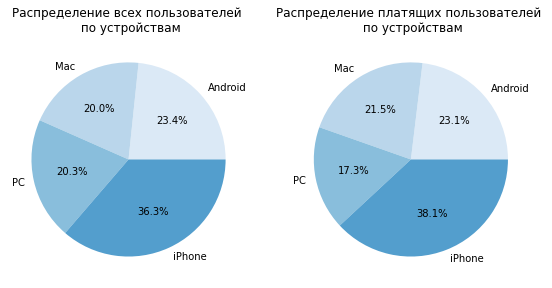

In [24]:
 # графики распределения пользователей по устройствам

# Создаем два объекта графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
colors = sns.color_palette("Blues")

# Создаем график для всех пользователей
ax1.pie(devices.total_users, labels=devices.device, autopct='%1.1f%%', colors=colors)
ax1.set_title('Распределение всех пользователей \n по устройствам')

# Создаем график для платящих пользователей
ax2.pie(devices.payers, labels=devices.device, autopct='%1.1f%%', colors=colors)
ax2.set_title('Распределение платящих пользователей \n по устройствам')

# Показываем графики
plt.tight_layout()
plt.show()



---

Большинство пользователей, как тех, кто платит, так и тех, кто пользуется приложением бесплатно, используют iPhone.   

Среди тех, кто платит за использование приложения, больше всего пользователей с Mac.


---



4. Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей.
Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
# распределение пользователей по каналам привлечения

channels = (
    profiles.groupby('channel')['user_id'].nunique().reset_index().
    merge(profiles[profiles['payer']==True].groupby('channel')['user_id'].nunique().reset_index(), on = 'channel', how = 'left')
)
channels.columns = ['channel','total_users','payers']
channels['payers_rate'] = (channels.payers/channels.total_users)*100

print('Распределение пользователей по каналам привлечения')
display(channels.sort_values(by='payers_rate', ascending=False)
        .reset_index(drop=True)
        .style.format({'payers_rate': '{:.2f}%'})
       )

Распределение пользователей по каналам привлечения


,channel,total_users,payers,payers_rate
0,FaceBoom,29144,3557,12.20%
1,AdNonSense,3880,440,11.34%
2,lambdaMediaAds,2149,225,10.47%
3,TipTop,19561,1878,9.60%
4,RocketSuperAds,4448,352,7.91%
5,WahooNetBanner,8553,453,5.30%
6,YRabbit,4312,165,3.83%
7,MediaTornado,4364,156,3.57%
8,LeapBob,8553,262,3.06%
9,OppleCreativeMedia,8605,233,2.71%


In [26]:
# Выделим
channels_ = channels.copy()

# Список категорий, которые нужно оставить
keep_channels = channels_.sort_values(by='payers_rate', ascending=False).channel[:6].tolist()
keep_channels.append('organic')

# Заменяем остальные категории на 'Other'
channels_['cat_channel'] = np.where(channels_['channel'].isin(keep_channels), channels_['channel'], 'Other')

channels_grouped = channels_.groupby('cat_channel')[['total_users', 'payers']].agg('sum')
channels_grouped['payers_rate'] = round((channels_grouped.payers/channels_grouped.total_users),3)
#display(channels_grouped.sort_values(by='payers_rate', ascending=False))

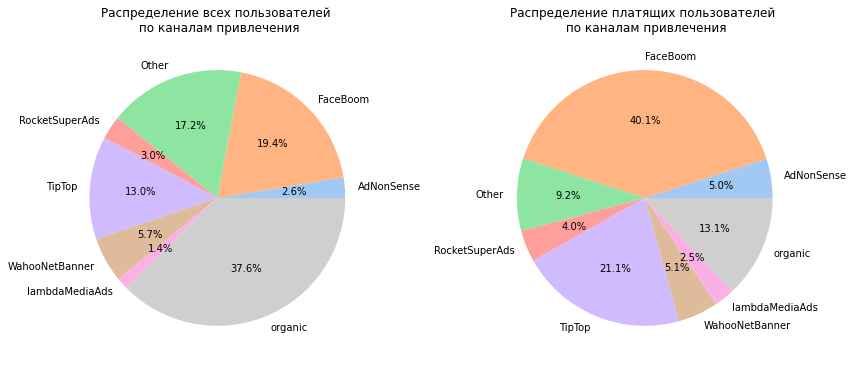

In [27]:
 # графики распределения пользователей по каналам привлечения

# Создаем два объекта графика
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
colors = sns.color_palette("pastel")

# Создаем график для всех пользователей
ax1.pie(channels_grouped.total_users, labels=channels_grouped.index, autopct='%1.1f%%', colors=colors)
ax1.set_title('Распределение всех пользователей \n по каналам привлечения')

# Создаем график для платящих пользователей
ax2.pie(channels_grouped.payers, labels=channels_grouped.index, autopct='%1.1f%%', colors=colors)
ax2.set_title('Распределение платящих пользователей \n по каналам привлечения')

# Показываем графики
plt.tight_layout()
plt.show()



---

Больше всего пользователей поступило по каналу "organic", где люди приходят самостоятельно, без рекламного привлечения.  

Лидируют по количеству привлеченных пользователей такие каналы, как FaceBoom и TipTop.  

По показателям привлечения платящих пользователей в лидерах каналы  FaceBoom и  AdNonSense.

---




В рамках этого раздела были изучены параметры распределения пользователей по нескольким категориям, с разбивкой на плательщиков и нет.

Составлены профили  пользователей. Лог содержит информацию о пользователях, которые присоединились к сервису с 1 мая по 27 октября 2019 года.   

Большинство пользователей сервиса — из США (66.7 %).
Конверсия в платящих пользователей среди жителей США также существенно выше, чем в Европейских странах: США ~ 7%, страны Европы ~ 4%.

Большинство пользователей используют iPhone. Среди тех, кто платит за использование приложения, больше всего пользователей с устройствами Mac и iPhone.

Больше всего пользователей поступило по каналу "organic", где люди приходят самостоятельно, без рекламного привлечения. Среди платных каналов лидируют по количеству привлеченных пользователей FaceBoom и TipTop.

По показателям процента привлечения платящих пользователей в лидерах каналы FaceBoom и AdNonSense.

## <a id='toc1_5_'></a>[Маркетинг](#toc0_)

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

In [28]:
# Расчет общей суммы расходов на маркетинг
print('Общая сумма расходов на маркетинг составила', round(costs['costs'].sum(), 1))

Общая сумма расходов на маркетинг составила 105497.3


In [29]:
# Распределение трат по рекламным источникам

costs_by_channel = costs.groupby('channel')['costs'].agg('sum').reset_index()
total_costs = costs_by_channel['costs'].sum()

# Расчет доли затрат каждого канала
costs_by_channel['cost_share'] = costs_by_channel['costs'].apply(lambda x: x / total_costs*100)

display(costs_by_channel
        .sort_values(by='cost_share', ascending=False)
        .reset_index(drop=True)
        .style.format({'cost_share': '{:.2f}%', 'costs':'{:.2f}'})
       )


,channel,costs,cost_share
0,TipTop,54751.30,51.90%
1,FaceBoom,32445.60,30.75%
2,WahooNetBanner,5151.00,4.88%
3,AdNonSense,3911.25,3.71%
4,OppleCreativeMedia,2151.25,2.04%
5,RocketSuperAds,1833.00,1.74%
6,LeapBob,1797.60,1.70%
7,lambdaMediaAds,1557.60,1.48%
8,MediaTornado,954.48,0.90%
9,YRabbit,944.22,0.90%


In [30]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week

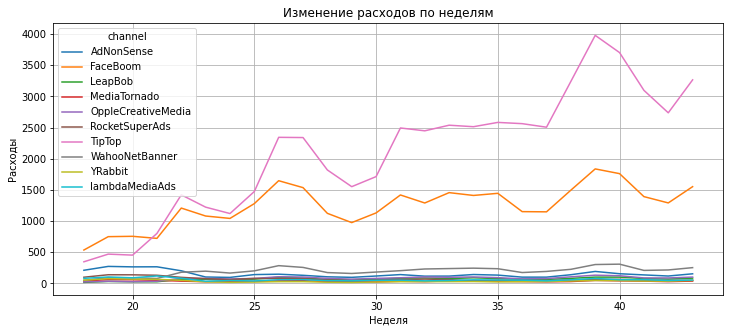

In [31]:
# График с визуализацией динамики изменения расходов во времени по неделям по каждому источнику

costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum',
).plot(figsize=(12, 5), grid=True)

plt.title('Изменение расходов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Расходы')
plt.show()


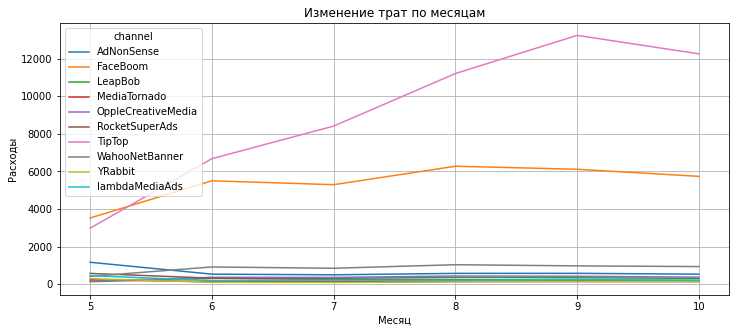

In [32]:
# График с визуализацией динамики изменения расходов во времени по месяцам по каждому источнику

costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum',
).plot(figsize=(12, 5), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Расходы')
plt.show()

In [34]:
# Cредняя стоимость привлечения одного пользователя (CAC) из каждого источника

# LTV с разбивкой по каналам привлечения

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel'])


In [35]:
max_dt = ltv_raw['dt'].max()
ltv_profiles = profiles.query('dt <= @max_dt')

# средняя стоимость привлечения одного пользователя (CAC) из каждого источника
cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
)
display(round(cac, 2).sort_values(by='acquisition_cost', ascending=False).reset_index())

,channel,acquisition_cost
0,TipTop,2.76
1,FaceBoom,1.11
2,AdNonSense,1.01
3,lambdaMediaAds,0.73
4,WahooNetBanner,0.60
5,RocketSuperAds,0.42
6,OppleCreativeMedia,0.25
7,MediaTornado,0.22
8,YRabbit,0.22
9,LeapBob,0.21


In [59]:
# Расчет среднего значения САС по проекту
cac_mean = ltv_profiles['acquisition_cost'].mean().round(2)
print('Средний САС по проекту: {}'.format(cac_mean))


Средний САС по проекту: 0.69


In [66]:
channels_huge_cac = cac.reset_index().query('acquisition_cost > @cac_mean')['channel'].unique()
channels_huge_cac_str = ', '.join(channels_huge_cac)
print('Список каналов, где САС превышает среднее по проекту:')
print(channels_huge_cac_str)


Список каналов, где САС превышает среднее по проекту:
AdNonSense, FaceBoom, TipTop, lambdaMediaAds




---


Общая сумма расходов на маркетинг за исследуемый период составила 105497.30.   

Каналы, на которые приходится большая доля расходов от общего бюджета — TipTop (52%) и FaceBoom (31%).  

Рекламные затраты для канала TipTop постоянно увеличиваются, однако количество и доля платящих пользователей, приходящих с этого источника, не так высоки.  

Стоимость привлечения пользователя от TipTop в среднем обходится в 2.76, FaceBoom - 1.11, AdNonSense - 1.01 при среднем САС по проекту 0.69.

---



## <a id='toc1_6_'></a>[Оценка окупаемости рекламы](#toc0_)

1. Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [37]:
profiles = profiles.query('channel != "organic"')

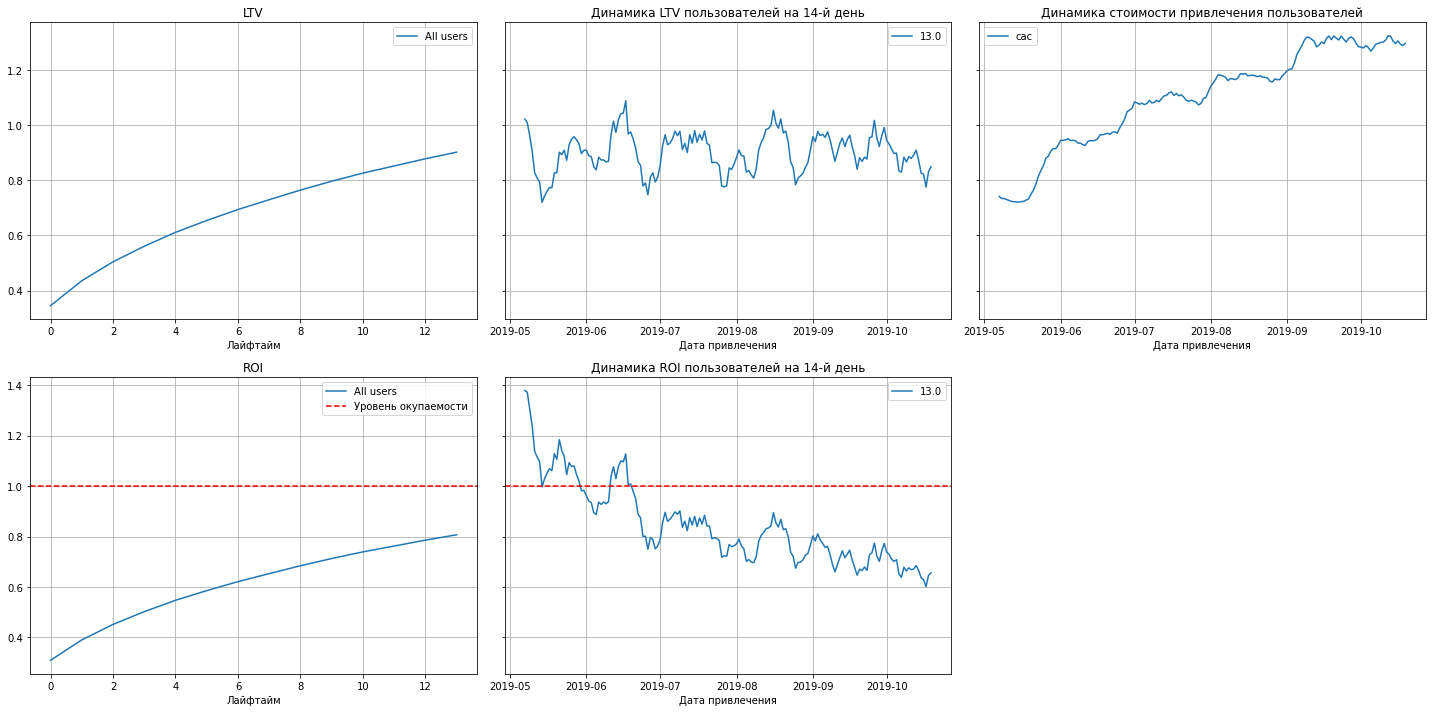

In [38]:
# Расчет LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days)

# Графики LTV и ROI, графики динамики LTV, CAC и ROI
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Уровень ROI далек от окупаемости.   

Стоимость привлечения пользователя существенно возрастает за исследуемый период.

2. Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

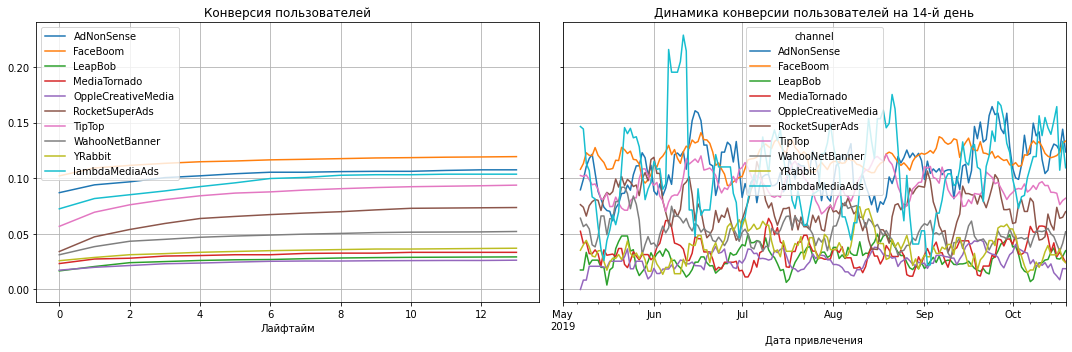

In [39]:
# Расчет конверсии и график динамики изменения
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Высокую конверсию показывают каналы FaceBoom, AdNonSense, TipTop и также lambdaMediaAds, от которого можно видеть максимальные уровни конверсии, хотя и не стабильные — возможно, более удачные рекламные кампании в этом канале приводят более качественную целевую аудиторию.

3. Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

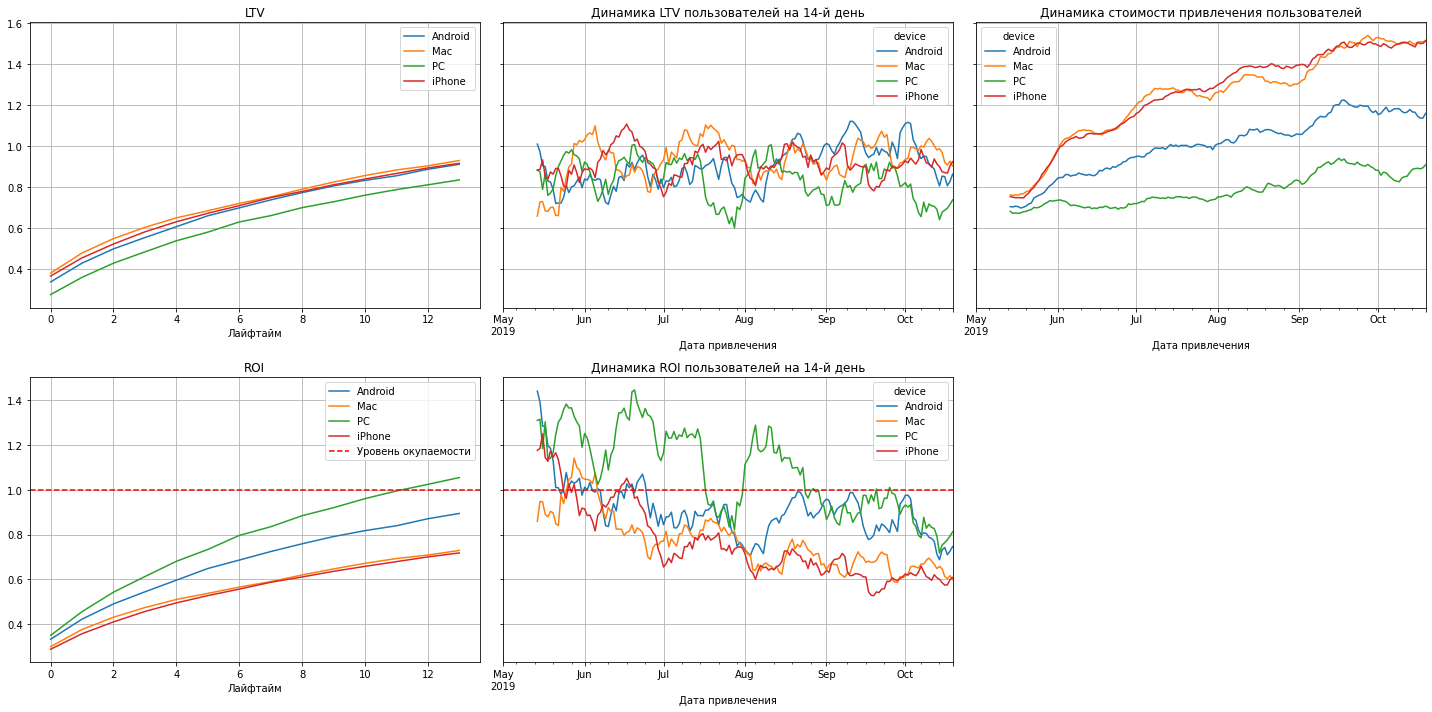

In [40]:
# Расчет окупаемости рекламы с разбивкой по устройствам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Можно отметить, что LTV пользователей PC ниже, чем для Mac и iPhone, однако затраты на рекламу для этих устройств выходят на окупаемость, а для устройств Apple затраты высоки и не окупаются.  

4. Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

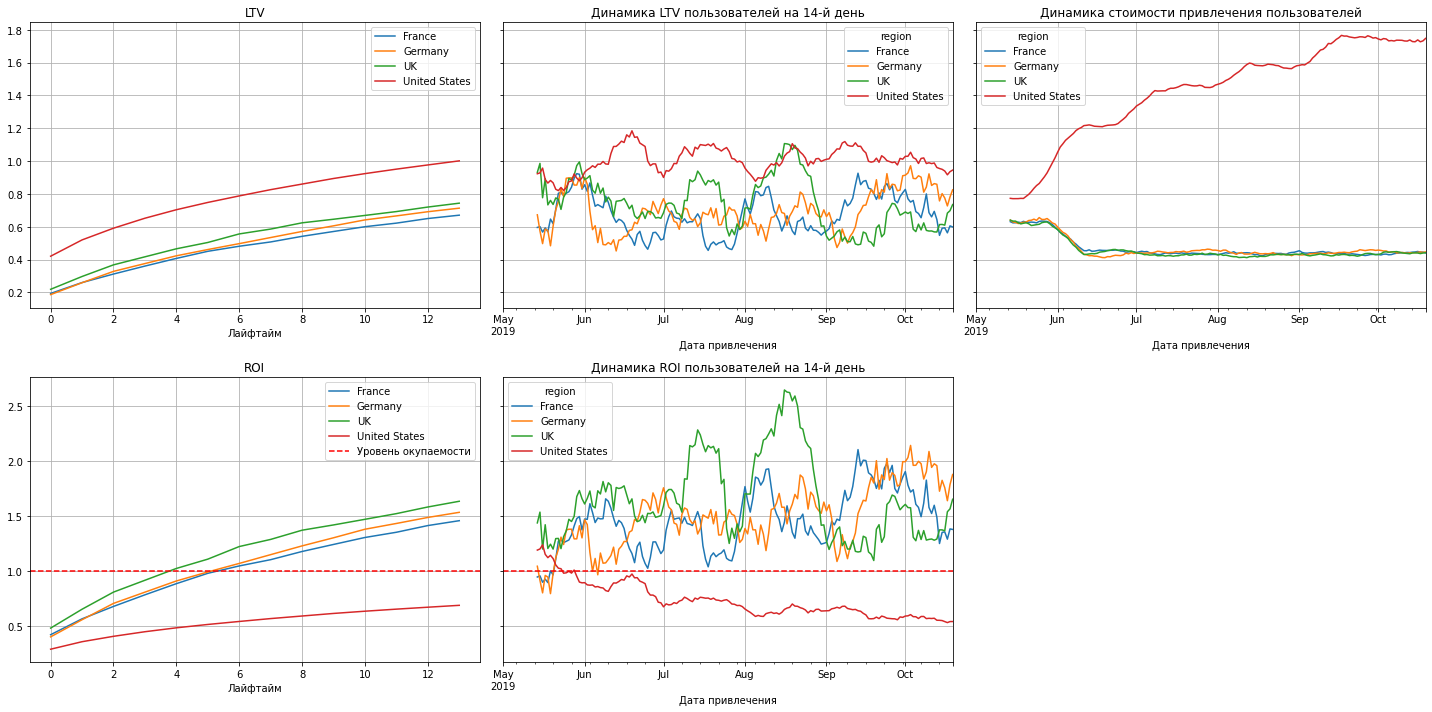

In [41]:
# Расчет окупаемости рекламы с разбивкой по странам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

От пользователей из США доход больше, чем от Европейских стран, однако их стоимость привлечения в несколько раз выше и постоянно растет. Большие затраты не позволяют выходить на уровень окупаемости. В Европейских странах затраты на рекламу окупаются к 7 дню.

5. Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

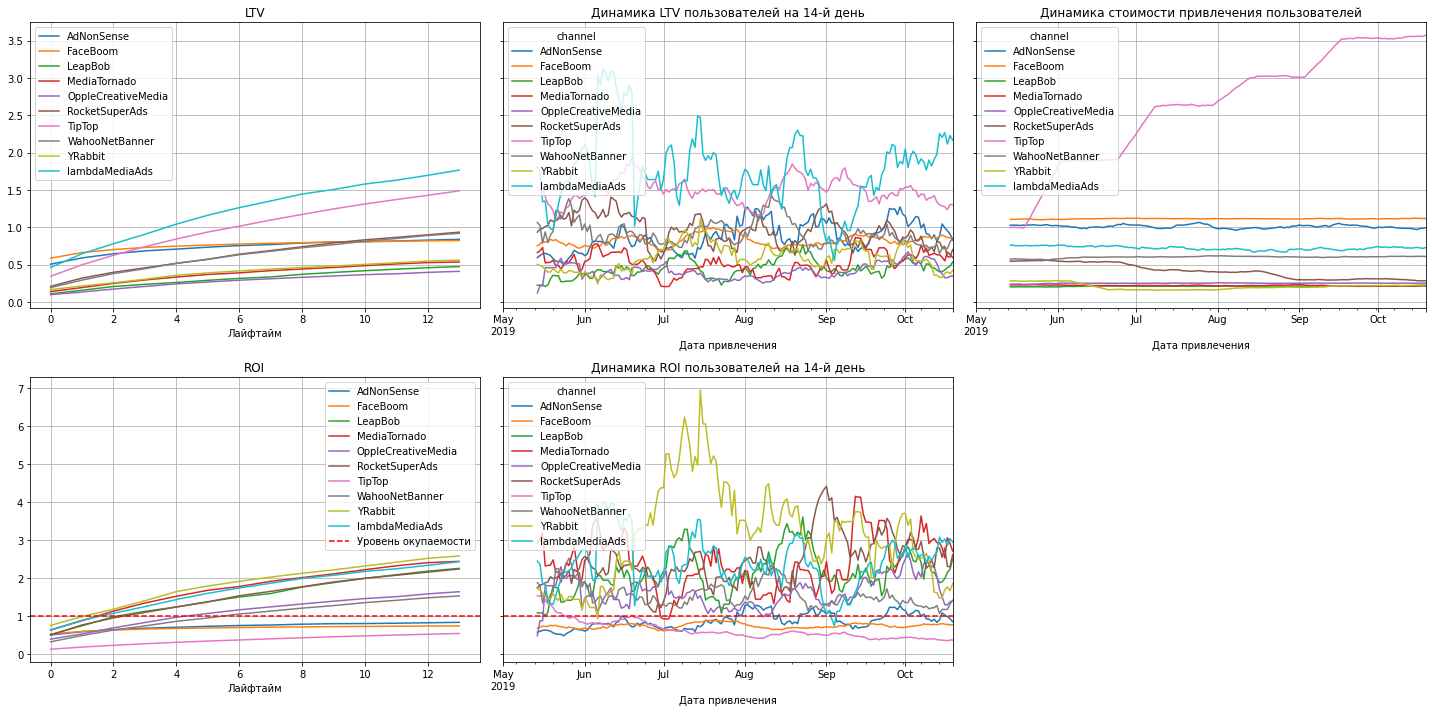

In [42]:
#  Расчет окупаемости рекламы с разбивкой по рекламным каналам

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

Затраты на рекламу в таких каналах, как TipTop, AdNonSense и FaceBoom не окупаются.   
Стоимость привлечения пользователей через канал TipTop оказавается в несколько раз дороже других каналов и цена постоянно растет.

Канал lambdaMediaAds показывает самые высокие доходы и умеренные затраты на привлечение клиента.

<br> </br>
Рассмотрим регионы по отдельности

In [43]:
# списки профилей для США и Европы
profiles_usa = profiles.loc[profiles['region'] == 'United States']
profiles_europe = profiles.loc[profiles['region'] != 'United States']

<br></br>

1. США

регион - США
Расчет окупаемости по каналам


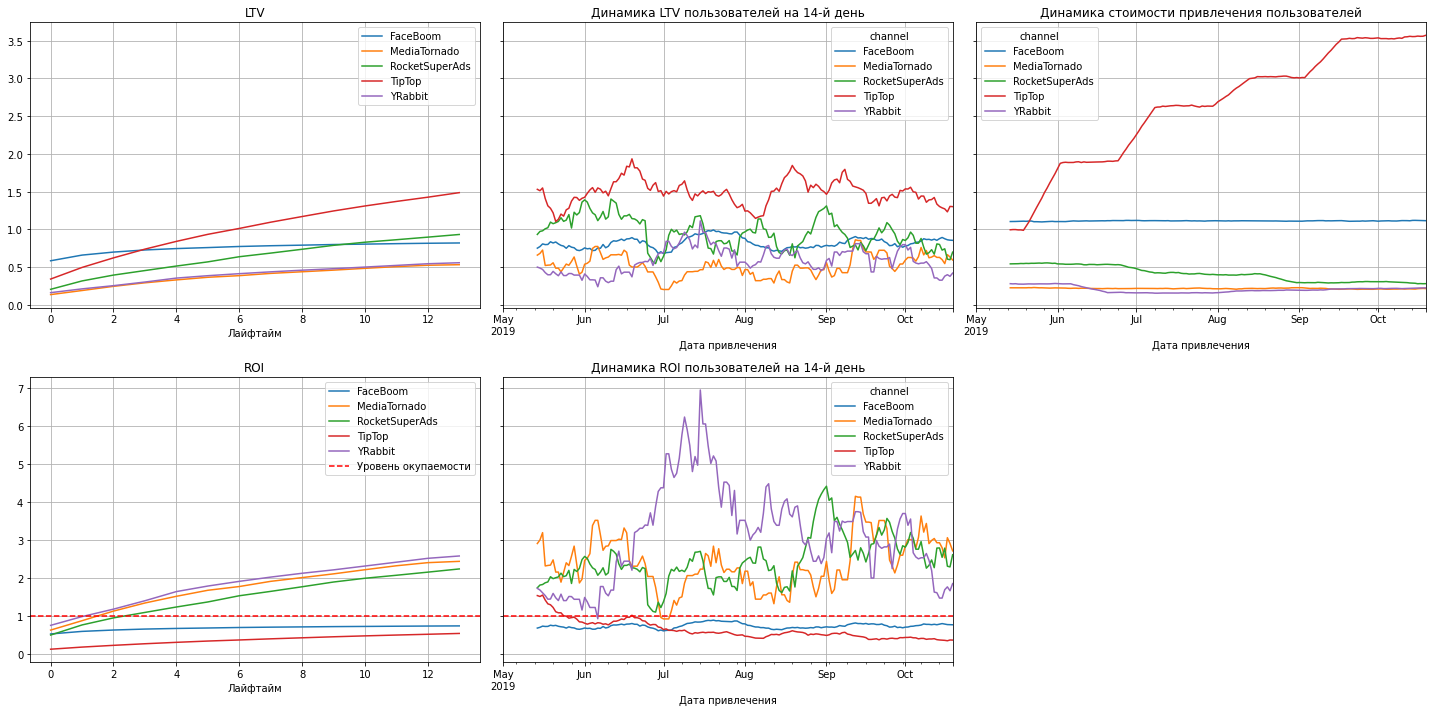

In [44]:
# Расчет окупаемости, распределение по каналам в США

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)

print('регион - США\nРасчет окупаемости по каналам')
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

регион - США
Расчет удержания пользователей


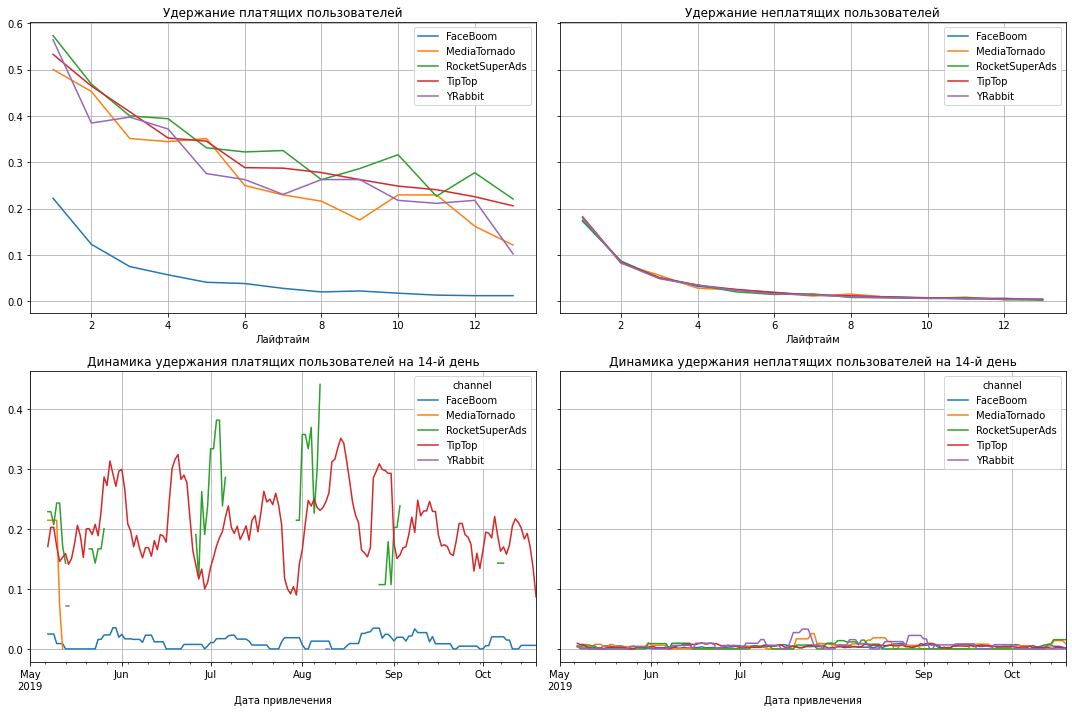

In [45]:
# Расчет удержания пользователей в США

#США
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)
print('регион - США\nРасчет удержания пользователей')
plot_retention(retention_grouped, retention_history, horizon_days)

В США затраты на рекламу в каналах TipTop и FaceBoom не окупаются.  
У TipTop очень высокая стоимость привлечения пользователей. 
FaceBoom - минимальное удержание платящих пользователей, что говорит о приходе нецелевой аудитории с канала.
  
У канала RocketSuperAds хорошее удержание платящих пользователей и низкие затраты на рекламу.

регион - США
Расчет окупаемости по устройствам


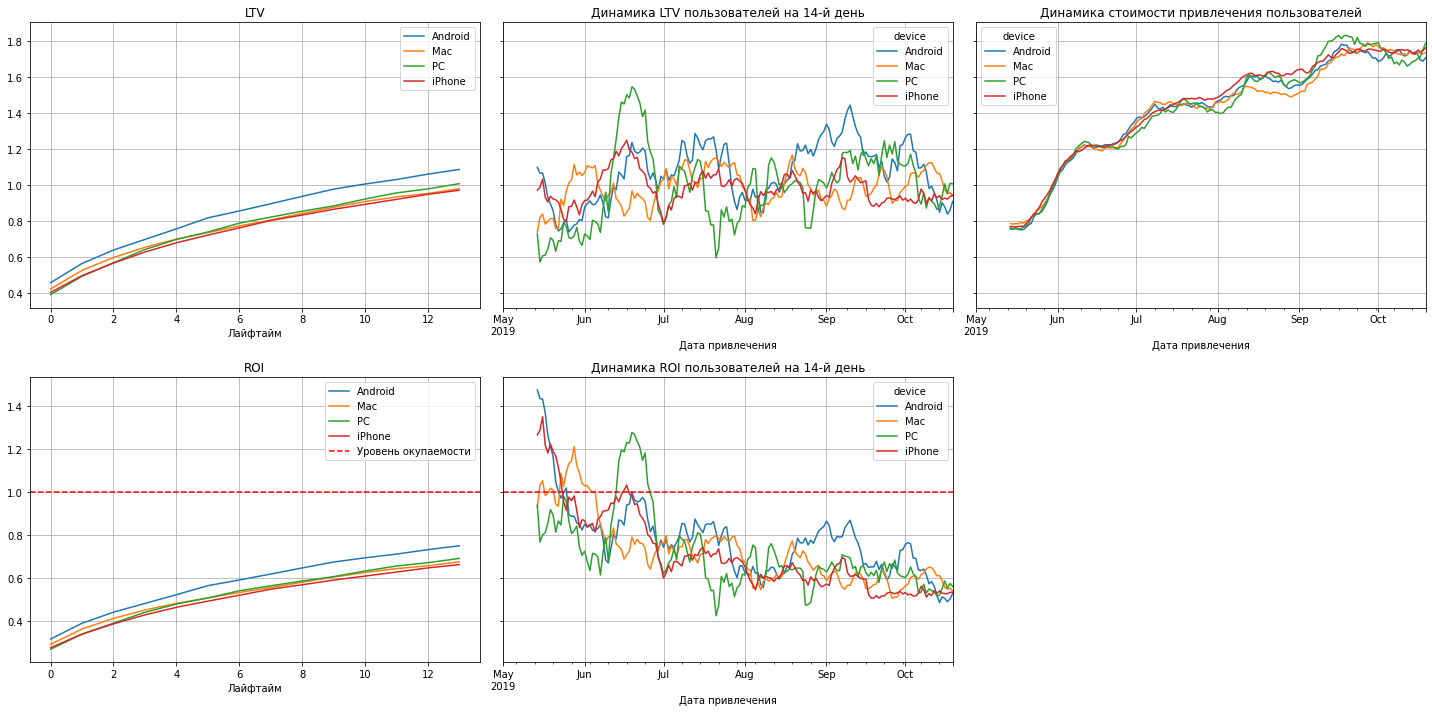

In [46]:
# Расчет окупаемости, распределение по устройствам в США 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device']
)

print('регион - США\nРасчет окупаемости по устройствам')

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В США реклама не окупается среди всех устройств - можно предположить, что проблема убытков не в определенном типе устройства. 


<br></br>
2. Европейские страны

регион - Европа
Расчет окупаемости по каналам


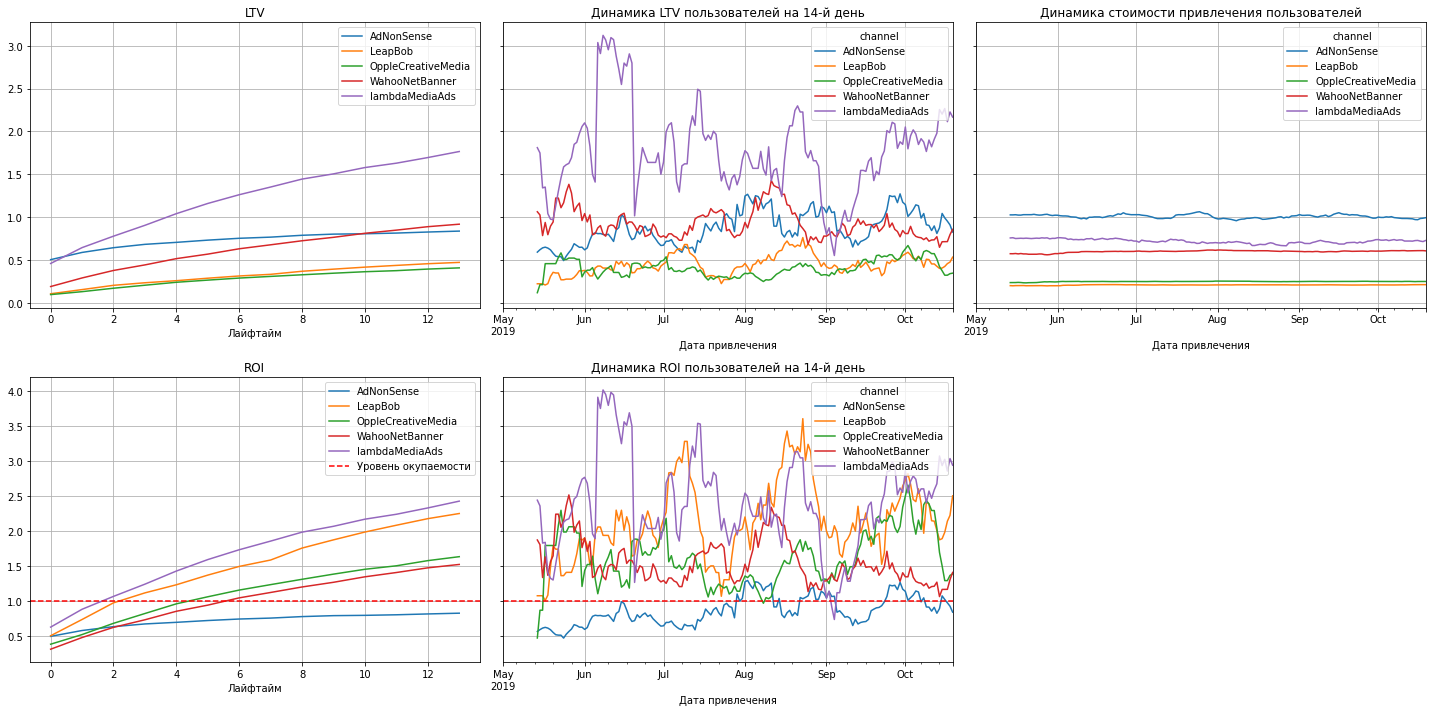

In [47]:
# Расчет окупаемости, распределение по каналам в Европейских странах
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['channel']
)

print('регион - Европа\nРасчет окупаемости по каналам')
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

регион - Европа
Расчет удержания пользователей


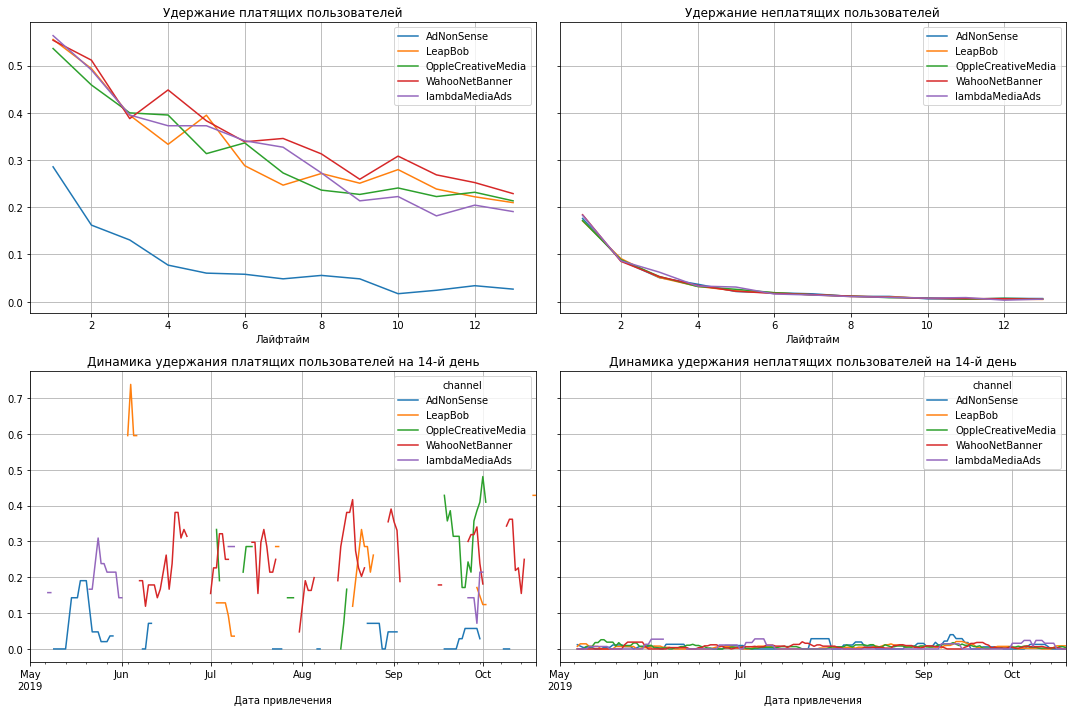

In [48]:
# Расчет удержания пользователей в Европейских странах
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_europe, visits, observation_date, horizon_days, dimensions=['channel']
)
print('регион - Европа\nРасчет удержания пользователей')
plot_retention(retention_grouped, retention_history, horizon_days)

В Европейских странах окупаются затраты на рекламу во всех каналах, кроме AdNonSense, который имеет слабое удержание платящих пользователей и более дорогую стоимость привлечения пользователей.  

Канал lambdaMediaAds показывает хорошую динамику ROI, быструю окупаемость и высокий LTV.

регион - Европа
Расчет окупаемости по устройствам


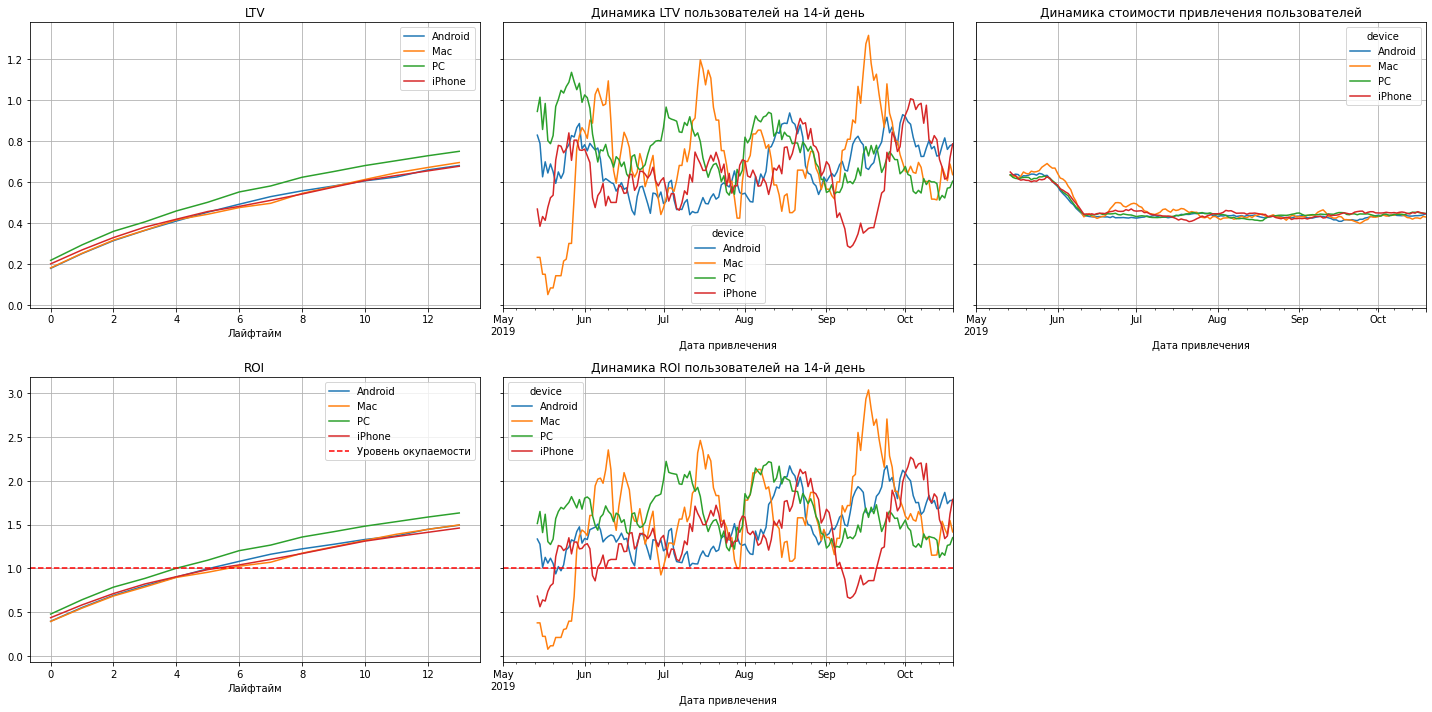

In [49]:
# Расчет окупаемости, распределение по устройствам в Европейских странах
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=['device']
)

print('регион - Европа\nРасчет окупаемости по устройствам')
plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

В Европейских странах затраты на рекламу окупаются на всех устройствах. 

С платформы PC показатель LTV выше других, однако динамика показателей ROI и LTV не высокая.  

Пользователи с Mac наоборот - иногда показывают максимальные значения. Возможно стоит проверить, какие рекламные кампании для данной платформы имели такое позитивное влияние.







--- 
6. Вывод

В США затраты на рекламу в основных каналах TipTop и FaceBoom не окупаются.  

По каналу TipTop основные показатели (LTV, динамики LTV, динамика удержания пользователей на 14 день) на высоком уровне, однако очень высокая стоимость привлечения пользователей не дает окупаться затратам.   
У канала FaceBoom минимальное удержание платящих пользователей, что говорит о приходе нецелевой аудитории с канала. 

Можно выделить канал RocketSuperAds, с которого хорошее удержание платящих пользователей и низкие затраты на рекламу.

<br></br>
В Европейских странах не окупается канал AdNonSense, который имеет слабое удержание платящих пользователей и высокую стоимость рекламы.  
Канал lambdaMediaAds показывает хорошую динамику ROI, быструю окупаемость и высокий LTV.

По влиянию типа устройства  - в США имеет сильное негативное влияние неэффективный основной рекламный канал, из-за чего по всем утройствам ROI ниже уровня окупаемости.  
В Европейских странах по всем устройствам уровень окупаемости примерно одинаковый, но можно выделить Mac как имеющий высокий потенциал.




## <a id='toc1_7_'></a>[Выводы](#toc0_)


Для развлекательного приложения Procrastinate Pro+ был проведен анализ, по какой причине несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.
<br/><br/>
Цель проекта — разобраться в причинах убытков и помочь компании выйти в плюс.

Доступны данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* лог сервера с данными об их посещениях,
* выгрузка их покупок за этот период,
* рекламные расходы.

Предстояло изучить:
* откуда приходят пользователи и какими устройствами они пользуются,
* сколько стоит привлечение пользователей из различных рекламных каналов,
* сколько денег приносит каждый клиент,
* когда расходы на привлечение клиента окупаются,
* какие факторы мешают привлечению клиентов.
<br/><br/>

В процессе предварительной обработки данных:

* загружены данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные visits, orders, costs:

 * Датасет visits содержит 309901 запись о визитах, стране пользователя, устройстве и канале привлечения,
 * В orders содержится информация о 40212 заказах,
 * В файле costs 1800 записей о рекламных расходах и каналах привлечения.

* пропусков и явных дубликатов не обнаружено
* названия столбцов приведены к нижнему регистру
* изменен тип данных в некоторых столбцах на временной
* проверен временной интервал на соответствие условию исследования
* числовые значения проверены на возможные ошибки. Аномалий не выявлено

<br/><br/>
В рамках исследовательского анализа были изучены параметры распределения пользователей по нескольким категориям, с разбивкой на плательщиков и нет.

* Составлены профили пользователей.

* Большинство пользователей сервиса — из США (66.7 %). Конверсия в платящих пользователей среди жителей США также существенно выше, чем в Европейских странах: США ~ 7%, страны Европы ~ 4%.

* Большинство пользователей используют iPhone. Среди тех, кто платит за использование приложения, больше всего пользователей с устройствами Mac и iPhone.

* Больше всего пользователей поступило по каналу "organic", где люди приходят самостоятельно, без рекламного привлечения. Среди платных каналов лидируют по количеству привлеченных пользователей FaceBoom и TipTop.

* По показателям процента привлечения платящих пользователей в лидерах каналы FaceBoom и AdNonSense.

<br/><br/>
Были изучены маркетинговые показатели:

* Общая сумма расходов на маркетинг за исследуемый период составила 105 497.30.   

* Каналы, в которые вложена основныя доля рекламного бюджета — TipTop (52%) и FaceBoom (31%).  

* Затраты на привлечение одного пользователя с канала TipTop в среднем обходится в 2.76, FaceBoom - 1.11, AdNonSense - 1.01 на пользователя, что существенно выше среднего САС по проекту - 0.69
<br/><br/>  
---


---

<br/><br/>
По результатам оценки окупаемости можно сделать вывод, что за исследуемый период затраты на рекламу не окупаются и маркетинговые стратегии следует пересмотреть.

- В США рекламный канал TipTop имеет хорошие показатели LTV, конверсии и удержания, однако требует слишком больших затрат, которые не окупаются.  
  Канал FaceBoom дешевле, однако также не окупается. Удержание пользователя от него низкое, что говорит о некачественной аудитории из этого источника.  
  Эти каналы были основными для продвижения компании, в них вложено 83% рекламного бюджета. 
Из-за их неокупаемости компания несет убытки.  
  В положительном ключе можно выделить канал RocketSuperAds, с которого хорошее удержание платящих пользователей и низкие затраты на рекламу.  


- В Европейских странах не окупается канал AdNonSense, который имеет слабое удержание пользователей и низкий ROI.  
  Канал lambdaMediaAds показывает хорошие результаты по конверсии, LTV и окупаемости 
 

- В США имеет сильное негативное влияние неэффективный основной рекламный канал, из-за чего по всем утройствам ROI ниже уровня окупаемости. В Европейских странах по всем устройствам уровень окупаемости примерно равный, но можно выделить Mac как имеющий высокий потенциал.
<br/><br/>


---

---
Такие каналы, как RocketSuperAds в США и lambdaMediaAds для Европейского рынка могут быть рекомендованы рекламному отделу для проведения маркетинговых действий как перспективные, так как имеют хороший уровень окупаемости, конверсии и LTV.

Дополнительно рекомендуется провести повторный анализ после изменения каналов привлечения.
<br/><br/>

---

